In [ ]:
import sqlite3   # To connect to SQLite database
import pandas as pd  # To display data nicely in tables


In [ ]:
# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect("expenses.db")

# Create a cursor to execute SQL commands
cursor = conn.cursor()

print("✅ Database connected successfully.")


✅ Database connected successfully.


In [ ]:
# SQL command to create the expenses table
create_table_query = """
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    amount REAL,
    category TEXT,
    note TEXT
)
"""

cursor.execute(create_table_query)
conn.commit()

print("✅ Table 'expenses' is ready.")


✅ Table 'expenses' is ready.


In [ ]:
# Sample data to insert
date = "2025-07-10"
amount = 250.00
category = "Food"
note = "Lunch with friends"

# Insert the expense
insert_query = """
INSERT INTO expenses (date, amount, category, note)
VALUES (?, ?, ?, ?)
"""

cursor.execute(insert_query, (date, amount, category, note))
conn.commit()

print("✅ Expense added successfully.")


✅ Expense added successfully.


In [ ]:
# Query all data
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

# Convert to DataFrame for pretty display
df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df




,ID,Date,Amount,Category,Note
0,1,2025-07-10,250.0,Food,Lunch with friends


In [ ]:
# Example: inserting another expense
date = "2025-07-11"
amount = 100.00
category = "Transport"
note = "Bus ticket"

cursor.execute(insert_query, (date, amount, category, note))
conn.commit()

print("✅ Another expense added.")


✅ Another expense added.


In [ ]:
category_filter = "Food"

query = """
SELECT * FROM expenses
WHERE category = ?
"""

cursor.execute(query, (category_filter,))
rows = cursor.fetchall()

df_filtered = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df_filtered


,ID,Date,Amount,Category,Note
0,1,2025-07-10,250.0,Food,Lunch with friends


In [ ]:
# Group expenses by month
query = """
SELECT substr(date, 1, 7) as month, SUM(amount)
FROM expenses
GROUP BY month
ORDER BY month
"""

cursor.execute(query)
rows = cursor.fetchall()

df_summary = pd.DataFrame(rows, columns=["Month", "Total Amount"])
df_summary


,Month,Total Amount
0,2025-07,350.0


In [ ]:
expense_id = 1  # Replace with the ID you want to delete

delete_query = "DELETE FROM expenses WHERE id = ?"
cursor.execute(delete_query, (expense_id,))
conn.commit()

print(f"✅ Expense with ID {expense_id} deleted (if it existed).")


✅ Expense with ID 1 deleted (if it existed).


In [ ]:
# Always close connection when finished
conn.close()
print("✅ Database connection closed.")


✅ Database connection closed.


In [ ]:
# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect("expenses.db")

# Create a cursor to execute SQL commands
cursor = conn.cursor()

print("✅ Database connected successfully.")


✅ Database connected successfully.


In [ ]:
# Example data
date = "2025-07-10"
amount = 250.00
category = "Food"
note = "Lunch with friends"

# Insert into expenses table
insert_query = """
INSERT INTO expenses (date, amount, category, note)
VALUES (?, ?, ?, ?)
"""

cursor.execute(insert_query, (date, amount, category, note))
conn.commit()

print("✅ Expense added successfully.")


✅ Expense added successfully.


In [ ]:
# Fetch all expenses from the table
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

# Display as DataFrame
df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df


,ID,Date,Amount,Category,Note
0,2,2025-07-11,100.0,Transport,Bus ticket
1,3,2025-07-10,250.0,Food,Lunch with friends


In [ ]:
# Example: inserting another expense
date = "2025-07-11"
amount = 100.00
category = "Transport"
note = "Bus ticket"

cursor.execute(insert_query, (date, amount, category, note))
conn.commit()

print("✅ Another expense added.")


✅ Another expense added.


In [ ]:
# List of multiple expenses to insert
expenses_data = [
    ("2025-07-11", 100.00, "Transport", "Bus ticket"),
    ("2025-07-12", 80.00, "Entertainment", "Movie ticket"),
    ("2025-07-12", 150.00, "Food", "Dinner at restaurant"),
    ("2025-07-13", 50.00, "Groceries", "Vegetables and fruits"),
    ("2025-07-14", 300.00, "Shopping", "New shoes"),
    ("2025-07-15", 200.00, "Bills", "Electricity bill"),
    ("2025-08-01", 120.00, "Food", "Breakfast at café"),
    ("2025-08-02", 75.00, "Transport", "Taxi fare"),
    ("2025-08-03", 250.00, "Shopping", "Clothes"),
]

# Insert all records into the database
insert_query = """
INSERT INTO expenses (date, amount, category, note)
VALUES (?, ?, ?, ?)
"""

cursor.executemany(insert_query, expenses_data)
conn.commit()

print("✅ Multiple expenses added successfully!")


✅ Multiple expenses added successfully!


In [ ]:
# Fetch all expenses from the table
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

# Display as DataFrame
df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df


,ID,Date,Amount,Category,Note
0,2,2025-07-11,100.0,Transport,Bus ticket
1,3,2025-07-10,250.0,Food,Lunch with friends
2,4,2025-07-11,100.0,Transport,Bus ticket
3,5,2025-07-11,100.0,Transport,Bus ticket
4,6,2025-07-12,80.0,Entertainment,Movie ticket
5,7,2025-07-12,150.0,Food,Dinner at restaurant
6,8,2025-07-13,50.0,Groceries,Vegetables and fruits
7,9,2025-07-14,300.0,Shopping,New shoes
8,10,2025-07-15,200.0,Bills,Electricity bill
9,11,2025-08-01,120.0,Food,Breakfast at café


In [ ]:
# Define the category you want to filter
category_filter = "Food"

# SQL query to select expenses by category
query = """
SELECT * FROM expenses
WHERE category = ?
"""

cursor.execute(query, (category_filter,))
rows = cursor.fetchall()

# Display as DataFrame
df_filtered = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df_filtered


,ID,Date,Amount,Category,Note
0,3,2025-07-10,250.0,Food,Lunch with friends
1,7,2025-07-12,150.0,Food,Dinner at restaurant
2,11,2025-08-01,120.0,Food,Breakfast at café


In [ ]:

# Define the category you want to filter
category_filter = "Transport"

# SQL query to select expenses by category
query = """
SELECT * FROM expenses
WHERE category = ?
"""

cursor.execute(query, (category_filter,))
rows = cursor.fetchall()

# Display as DataFrame
df_filtered = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df_filtered


,ID,Date,Amount,Category,Note
0,2,2025-07-11,100.0,Transport,Bus ticket
1,4,2025-07-11,100.0,Transport,Bus ticket
2,5,2025-07-11,100.0,Transport,Bus ticket
3,12,2025-08-02,75.0,Transport,Taxi fare


In [ ]:
# Group expenses by month (YYYY-MM) and sum amounts
query = """
SELECT substr(date, 1, 7) AS month, SUM(amount)
FROM expenses
GROUP BY month
ORDER BY month
"""

cursor.execute(query)
rows = cursor.fetchall()

# Display as DataFrame
df_summary = pd.DataFrame(rows, columns=["Month", "Total Amount"])
df_summary


,Month,Total Amount
0,2025-07,1330.0
1,2025-08,445.0


In [ ]:
# View all expenses with IDs
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df


,ID,Date,Amount,Category,Note
0,2,2025-07-11,100.0,Transport,Bus ticket
1,3,2025-07-10,250.0,Food,Lunch with friends
2,4,2025-07-11,100.0,Transport,Bus ticket
3,5,2025-07-11,100.0,Transport,Bus ticket
4,6,2025-07-12,80.0,Entertainment,Movie ticket
5,7,2025-07-12,150.0,Food,Dinner at restaurant
6,8,2025-07-13,50.0,Groceries,Vegetables and fruits
7,9,2025-07-14,300.0,Shopping,New shoes
8,10,2025-07-15,200.0,Bills,Electricity bill
9,11,2025-08-01,120.0,Food,Breakfast at café


In [ ]:
# Change this to the ID you want to delete
expense_id = 2

# Delete query
delete_query = "DELETE FROM expenses WHERE id = ?"

cursor.execute(delete_query, (expense_id,))
conn.commit()

print(f"✅ Expense with ID {expense_id} deleted (if it existed).")


✅ Expense with ID 2 deleted (if it existed).


In [ ]:
# View all expenses again
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])
df


,ID,Date,Amount,Category,Note
0,3,2025-07-10,250.0,Food,Lunch with friends
1,4,2025-07-11,100.0,Transport,Bus ticket
2,5,2025-07-11,100.0,Transport,Bus ticket
3,6,2025-07-12,80.0,Entertainment,Movie ticket
4,7,2025-07-12,150.0,Food,Dinner at restaurant
5,8,2025-07-13,50.0,Groceries,Vegetables and fruits
6,9,2025-07-14,300.0,Shopping,New shoes
7,10,2025-07-15,200.0,Bills,Electricity bill
8,11,2025-08-01,120.0,Food,Breakfast at café
9,12,2025-08-02,75.0,Transport,Taxi fare


In [ ]:
import matplotlib.pyplot as plt


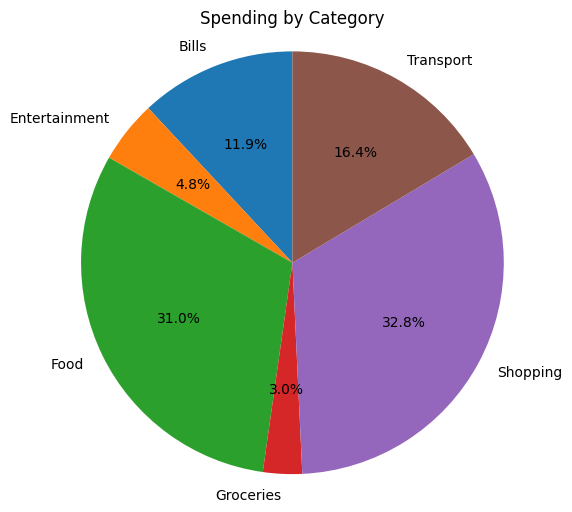

In [ ]:
# Query: total amount per category
query = """
SELECT category, SUM(amount)
FROM expenses
GROUP BY category
"""

cursor.execute(query)
data = cursor.fetchall()

# Split into labels and values
labels = [row[0] for row in data]
values = [row[1] for row in data]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Spending by Category")
plt.axis('equal')
plt.show()


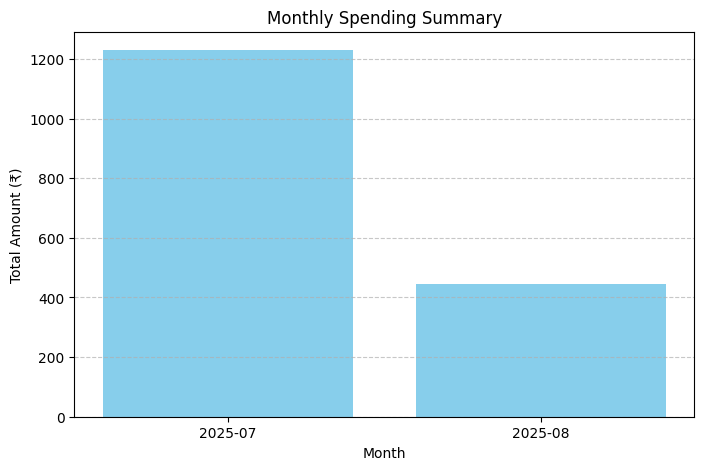

In [ ]:
# Query: total amount per month
query = """
SELECT substr(date, 1, 7) AS month, SUM(amount)
FROM expenses
GROUP BY month
ORDER BY month
"""

cursor.execute(query)
data = cursor.fetchall()

# Prepare data
months = [row[0] for row in data]
totals = [row[1] for row in data]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(months, totals, color='skyblue')
plt.title("Monthly Spending Summary")
plt.xlabel("Month")
plt.ylabel("Total Amount (₹)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


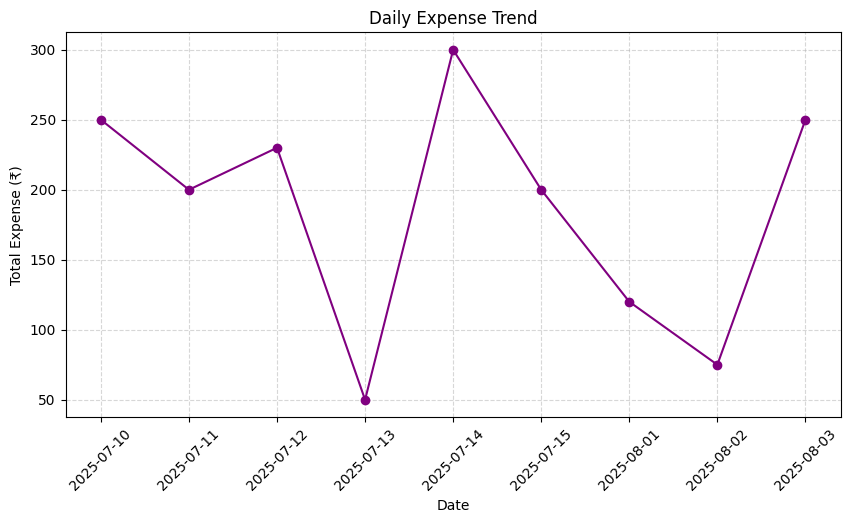

In [ ]:
# Query daily totals
query = """
SELECT date, SUM(amount)
FROM expenses
GROUP BY date
ORDER BY date
"""

cursor.execute(query)
data = cursor.fetchall()

# Prepare data
dates = [row[0] for row in data]
totals = [row[1] for row in data]

# Plot
plt.figure(figsize=(10,5))
plt.plot(dates, totals, marker='o', color='purple')
plt.title("Daily Expense Trend")
plt.xlabel("Date")
plt.ylabel("Total Expense (₹)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


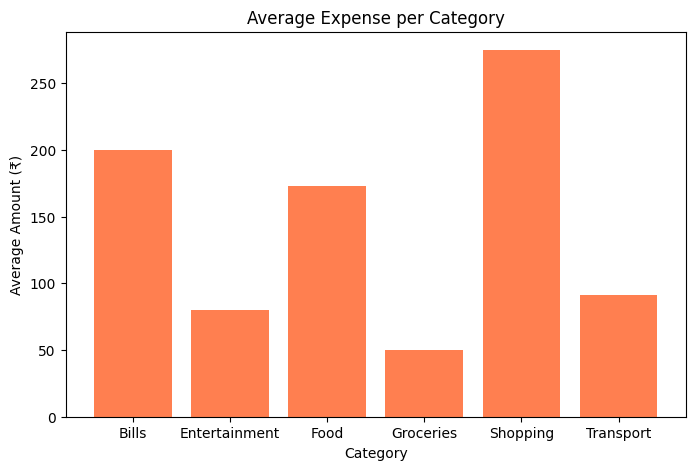

In [ ]:
# Query average amount per category
query = """
SELECT category, AVG(amount)
FROM expenses
GROUP BY category
"""

cursor.execute(query)
data = cursor.fetchall()

# Prepare data
categories = [row[0] for row in data]
averages = [row[1] for row in data]

# Plot
plt.figure(figsize=(8,5))
plt.bar(categories, averages, color='coral')
plt.title("Average Expense per Category")
plt.xlabel("Category")
plt.ylabel("Average Amount (₹)")
plt.show()


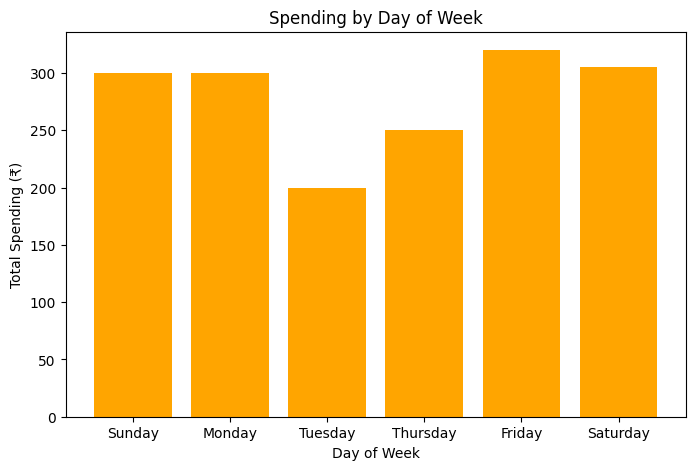

In [ ]:
# Query: total expenses grouped by weekday name
query = """
SELECT 
    strftime('%w', date) AS weekday_num,
    CASE strftime('%w', date)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS weekday_name,
    SUM(amount)
FROM expenses
GROUP BY weekday_num
ORDER BY weekday_num
"""

cursor.execute(query)
data = cursor.fetchall()

# Prepare data
weekdays = [row[1] for row in data]
totals = [row[2] for row in data]

# Plot
plt.figure(figsize=(8,5))
plt.bar(weekdays, totals, color='orange')
plt.title("Spending by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Spending (₹)")
plt.show()


In [ ]:
# Fetch all data from expenses table
query = "SELECT * FROM expenses"
cursor.execute(query)
rows = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(rows, columns=["ID", "Date", "Amount", "Category", "Note"])

# Display to check
df


,ID,Date,Amount,Category,Note
0,3,2025-07-10,250.0,Food,Lunch with friends
1,4,2025-07-11,100.0,Transport,Bus ticket
2,5,2025-07-11,100.0,Transport,Bus ticket
3,6,2025-07-12,80.0,Entertainment,Movie ticket
4,7,2025-07-12,150.0,Food,Dinner at restaurant
5,8,2025-07-13,50.0,Groceries,Vegetables and fruits
6,9,2025-07-14,300.0,Shopping,New shoes
7,10,2025-07-15,200.0,Bills,Electricity bill
8,11,2025-08-01,120.0,Food,Breakfast at café
9,12,2025-08-02,75.0,Transport,Taxi fare


In [ ]:
# Save DataFrame to CSV file
df.to_csv("expenses_data.csv", index=False)

print("✅ Data exported to 'expenses_data.csv'.")


✅ Data exported to 'expenses_data.csv'.


In [ ]:
# Save DataFrame to Excel
df.to_excel("expenses_data.xlsx", index=False)

print("✅ Data exported to 'expenses_data.xlsx'.")


✅ Data exported to 'expenses_data.xlsx'.


In [ ]:
# Monthly summary query
query = """
SELECT substr(date, 1, 7) AS Month, SUM(amount) AS Total
FROM expenses
GROUP BY Month
ORDER BY Month
"""

cursor.execute(query)
rows = cursor.fetchall()

# Create DataFrame
df_summary = pd.DataFrame(rows, columns=["Month", "Total"])

# Export to Excel
df_summary.to_excel("monthly_summary.xlsx", index=False)

print("✅ Monthly summary exported to 'monthly_summary.xlsx'.")


✅ Monthly summary exported to 'monthly_summary.xlsx'.
